# Gaussian Process

In this notebook, I apply a Gaussian process to estimate/predict the sine function behaviour with only a few points.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [ ]:
# Define the function to predict
def f(x):
    return np.sin(x)

# Create the sample data
X = np.atleast_2d(np.linspace(1, 10, 7)).T
y = f(X).ravel()

# Add noise to the data
y += 0.1 * np.random.randn(y.shape[0])

# Define the kernel
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Create GaussianProcessRegressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit to the data
gp.fit(X, y)

# Make predictions on the test data
x_pred = np.atleast_2d(np.linspace(1, 10, 1000)).T
y_pred, sigma = gp.predict(x_pred, return_std=True)

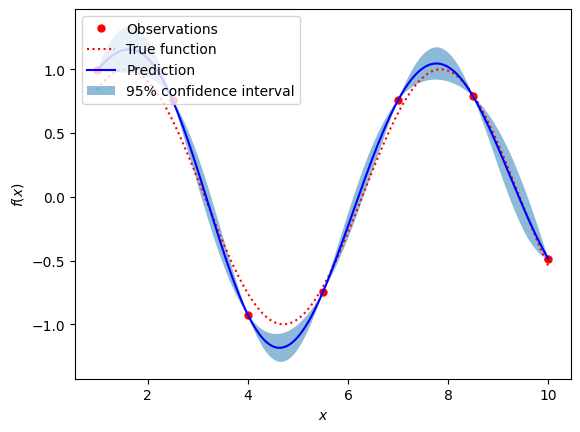

In [ ]:
# Plot the results
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x_pred, f(x_pred), 'r:', label='True function')
plt.plot(x_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')
plt.show()